In [1]:
# 넘파이, 판다스, 맷플롯립
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 사이킷런
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')


In [2]:
#데이터 불러오고 타입 확인
df = pd.read_csv('data3.csv')
print(df.dtypes)

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object


In [3]:
#데이터 가공
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['hour'] = df['date'].apply(lambda x: x.hour)
df['minute'] = df['date'].apply(lambda x: x.minute)
df['date'] = pd.to_datetime(df['date'], utc=True).dt.strftime('%Y%m%d%H%M').astype(int)

#데이터 가공 후 타입 확인
print(df.dtypes)

number_people             int64
date                      int64
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
day                       int64
minute                    int64
dtype: object


In [4]:
# 데이터 설정
y = df['number_people']
X = df.drop(['number_people','timestamp','date'], axis=1)

# X 데이터 확인
print(X.dtypes)

day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
day                       int64
minute                    int64
dtype: object


In [5]:
# 훈련/테스트 세트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# 스탠다드 스케일링 하기
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [6]:
# 스케일링 결과 확인
X_train

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour,day,minute
87446,1.507713,1.589116,-0.051356,-0.723453,-0.292054,0.716852,-0.708642,0.112211,-1.690320,0.651167
19486,-0.995080,-0.629281,-0.051356,1.118826,-0.292054,0.716852,-1.290055,-0.334135,-1.690320,-1.661684
40945,-1.495638,-0.629281,-0.051356,1.166822,-0.292054,-1.394988,0.163477,0.260993,0.697705,0.535525
81623,-1.495638,-0.629281,-0.051356,-0.847445,-0.292054,0.716852,-1.580761,1.153684,1.493713,0.072955
46628,-1.495638,-0.629281,-0.051356,1.125225,-0.292054,0.716852,0.744890,1.302466,-1.462889,-0.216152
...,...,...,...,...,...,...,...,...,...,...
3004,-1.495638,-0.629281,-0.051356,1.135624,-0.292054,0.716852,0.454183,-0.929263,-0.212019,0.072955
18710,-1.495638,-0.629281,-0.051356,0.940437,-0.292054,0.716852,-1.580761,-0.334135,0.697705,-1.661684
96647,0.506596,-0.629281,-0.051356,-0.957037,-0.292054,-1.394988,-0.127229,-0.036571,-0.894312,-0.736543
79329,1.007154,1.589116,-0.051356,-0.905041,-0.292054,0.716852,-1.580761,0.260993,-1.121742,0.072955


In [7]:
# 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
y_pred = model.predict(X_test)

# 평균 제곱 오차(MSE)와 R-squared 값 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 36.97020991913766
R-squared: 0.9279378071491606


In [9]:
#예측 테스트 해보기
test_predict = pd.DataFrame([[4, 1, 1, 50.00, 0, 0, 5, 11, 12, 35]], columns=X_test.columns)
test_predict = scaler.transform(test_predict)
print(model.predict(test_predict))


[21.98]


In [10]:
# import pickle

# # 모델 저장
# with open('RFR_GYM_model_v2.pkl', 'wb') as f:
#     pickle.dump(model, f)

# # StandardScaler 객체 저장
# with open('RFR_GYM_scaler_v2.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

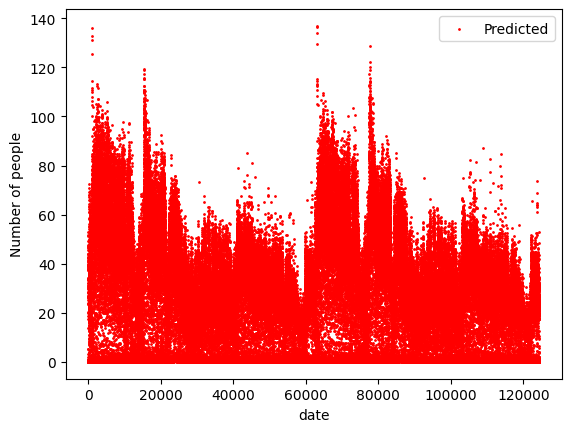

In [13]:
X_scale = scaler.transform(X)
pred = model.predict(X_scale)

plt.scatter(X.index, pred, s=1, color='red', label='Predicted')
plt.xlabel('date')
plt.ylabel('Number of people')
plt.legend()
plt.show()